# Generating Data

X= [[-5.12910862 -5.07078443]
 [-5.11213415 -5.09569497]
 [-5.3505405  -5.30759845]
 ...
 [ 5.0803634   5.05918694]
 [ 5.05719897  5.12563953]
 [ 4.82098778  4.58835786]]
y= [0. 0. 0. ... 0. 0. 0.]


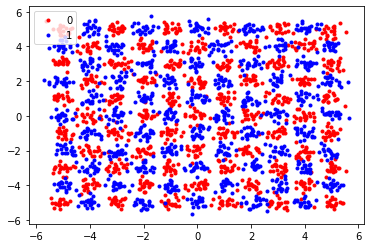

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

samples_per_cluster = 20
range_len = 10
var = 0.05

X = np.zeros(((range_len + 1) ** 2 * samples_per_cluster, 2))
y = np.zeros((range_len + 1) ** 2 * samples_per_cluster)
for x_cord in range(0, range_len + 1):
    for y_cord in range(0, range_len + 1):
        #print(y_cord, x_cord)
        X[(y_cord + x_cord * (range_len + 1)) * samples_per_cluster:(y_cord + x_cord * (range_len + 1) + 1) * samples_per_cluster] = np.random.multivariate_normal(
            (x_cord - int(range_len / 2), y_cord - int(range_len / 2)), cov=[[var, 0], [0, var]], size=samples_per_cluster)
        y[(y_cord + x_cord * (range_len + 1)) * samples_per_cluster:(y_cord + x_cord * (range_len + 1) + 1) * samples_per_cluster] = (x_cord + y_cord) % 2
print('X=', X)
print('y=', y)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'r.', label='0')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'b.', label='1')
plt.legend()
plt.show()

# Splitting Data

In [2]:
split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

# KNN

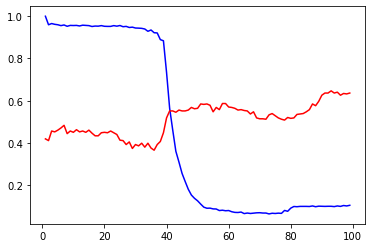

In [3]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 100):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot(np.arange(1, 100, 1), np.array(train_scores), 'b-')
plt.plot(np.arange(1, 100, 1), np.array(test_scores), 'r-')

# SVM

C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Atousa\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


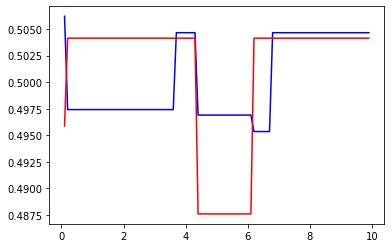

In [4]:
from sklearn.svm import SVC

train_scores = []
test_scores = []
for c in np.arange(0.1, 10, 0.1):
    clf = SVC(C=c, kernel='rbf', max_iter=20)
    clf.fit(X_train, y_train)
    
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot(np.arange(0.1, 10, 0.1), np.array(train_scores), 'b-')
plt.plot(np.arange(0.1, 10, 0.1), np.array(test_scores), 'r-')

# Logistic Regression

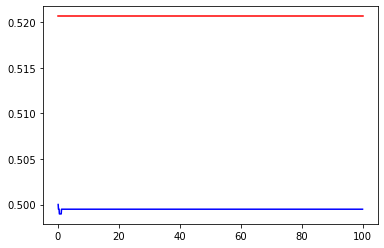

In [5]:
from sklearn.linear_model import LogisticRegression

train_scores = []
test_scores = []
for c in np.arange(0.1, 100, 0.1):
    clf = LogisticRegression(C=c, penalty='l2')
    clf.fit(X_train, y_train)
    
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot(np.arange(0.1, 100, 0.1), np.array(train_scores), 'b-')
plt.plot(np.arange(0.1, 100, 0.1), np.array(test_scores), 'r-')